In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [5]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [6]:
df_profiles.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
44cce65ce4ca61964ce830d232f6c635bc820b05,0.492661,0.686522,0.495972,0.818585,0.591772,0.069893,0.239798,0.186586,0.214327,0.474339,0.510071,0.772785


In [8]:
df_profiles_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')
df_profiles_kmeans.shape

(1000, 13)

In [9]:
df_profiles_hierarchical = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')
df_profiles_hierarchical.shape

(1000, 13)

# **Моя гіпотеза**: профілі користувачів, що належать до одного кластеру візуально схожі

## **Візуалізація**

In [17]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

In [39]:
import math

In [50]:
def plot_overlay_user_profiles(data:pd.DataFrame, features:list, n_cols:int=3, figsize:tuple=(15, 10), find_average:bool=False):
    num_features = len(features)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    clusters = data['cluster'].unique()
    n_clusters = len(clusters)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw={'projection': 'polar'})
    axs = axs.flatten()
    fig.suptitle(f'Overlayed Tracks in Each Cluster\nClusters: {clusters}', fontsize=16, fontweight='bold')

    for i, cluster in enumerate(clusters):
        ax = axs[i]
        cluster_data = data[data['cluster'] == cluster]

        if find_average == True:
            average_user_of_cluster = cluster_data.mean()
            values_average = average_user_of_cluster[features].values
            values_average = np.append(values_average, values_average[0])

        for _, rec in cluster_data.iterrows():
            values = rec[features].values
            values = np.append(values, values[0])

            ax.plot(angles, values, linewidth=1.5, color='maroon')
            ax.fill(angles, values, alpha=0.1, color='maroon')
        ax.plot(angles, values_average, linewidth=1.5, color='gold')
        ax.fill(angles, values_average, alpha=0.1, color='gold')

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=8)
        ax.set_yticklabels([])
        ax.set_title(f'Cluster {cluster}', fontsize=12, fontweight='bold')

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

## **Перевіримо на даних кластеризованих за допомогою kmeans**

In [10]:
df_profiles_kmeans.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_k_5
user_id,,,,,,,,,,,,,
138d73356c23e6e12aa82fb5dc9225428c196464,0.499678,0.688134,0.462286,0.827802,0.762681,0.050833,0.218361,0.115214,0.190605,0.468549,0.530255,0.782971,3


In [11]:
df_profiles_kmeans.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_k_5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.513059,0.674371,0.481304,0.816065,0.649721,0.068201,0.227894,0.222611,0.204770,0.451103,0.518801,0.779535,1.888000
std,0.052281,0.079880,0.037776,0.019010,0.086235,0.015644,0.095245,0.106505,0.022980,0.058992,0.017399,0.010686,1.345833
min,0.315669,0.406084,0.343069,0.744280,0.373041,0.040155,0.011339,0.040611,0.147316,0.207768,0.454888,0.725482,0.000000
25%,0.484194,0.626815,0.456543,0.804280,0.592875,0.056593,0.160467,0.140799,0.189237,0.418988,0.508473,0.774194,1.000000
50%,0.513454,0.675843,0.480753,0.817420,0.652174,0.065174,0.219020,0.201168,0.203074,0.454969,0.518339,0.780834,2.000000
75%,0.546819,0.719247,0.506295,0.828636,0.706476,0.075863,0.283254,0.280811,0.217843,0.490144,0.529675,0.786807,3.000000
max,0.650312,0.910921,0.587233,0.864867,0.912458,0.151378,0.572779,0.604928,0.314592,0.595472,0.584769,0.824771,4.000000


In [12]:
df_profiles_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, ec6dfcf19485cb011e0b22637075037aae34cf26 to 7940925886a70f6fa56085a8fc4444efbb5ea41f
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   key               1000 non-null   float64
 3   loudness          1000 non-null   float64
 4   mode              1000 non-null   float64
 5   speechiness       1000 non-null   float64
 6   acousticness      1000 non-null   float64
 7   instrumentalness  1000 non-null   float64
 8   liveness          1000 non-null   float64
 9   valence           1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  time_signature    1000 non-null   float64
 12  cluster_k_5       1000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 109.4+ KB


In [14]:
df_profiles_kmeans.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster']

In [15]:
df_profiles_kmeans['cluster'].unique(), df_profiles_kmeans['cluster'].nunique()

(array([2, 3, 1, 4, 0], dtype=int64), 5)

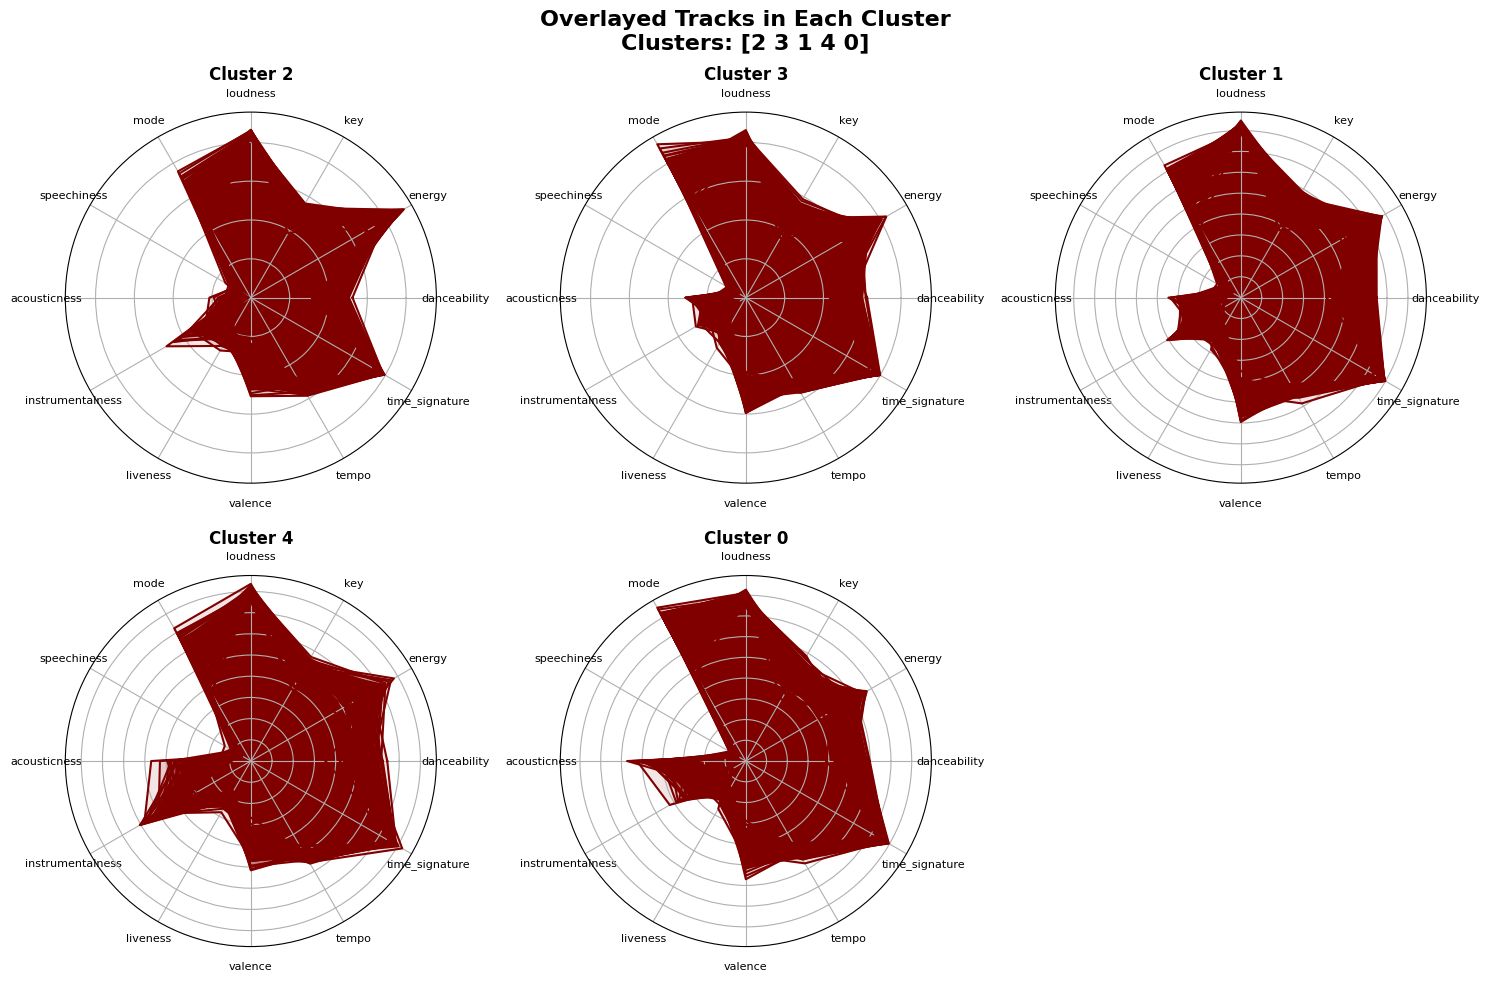

In [40]:
data_to_visualize = df_profiles_kmeans
plot_overlay_user_profiles(
    data=data_to_visualize,
    features=features
)

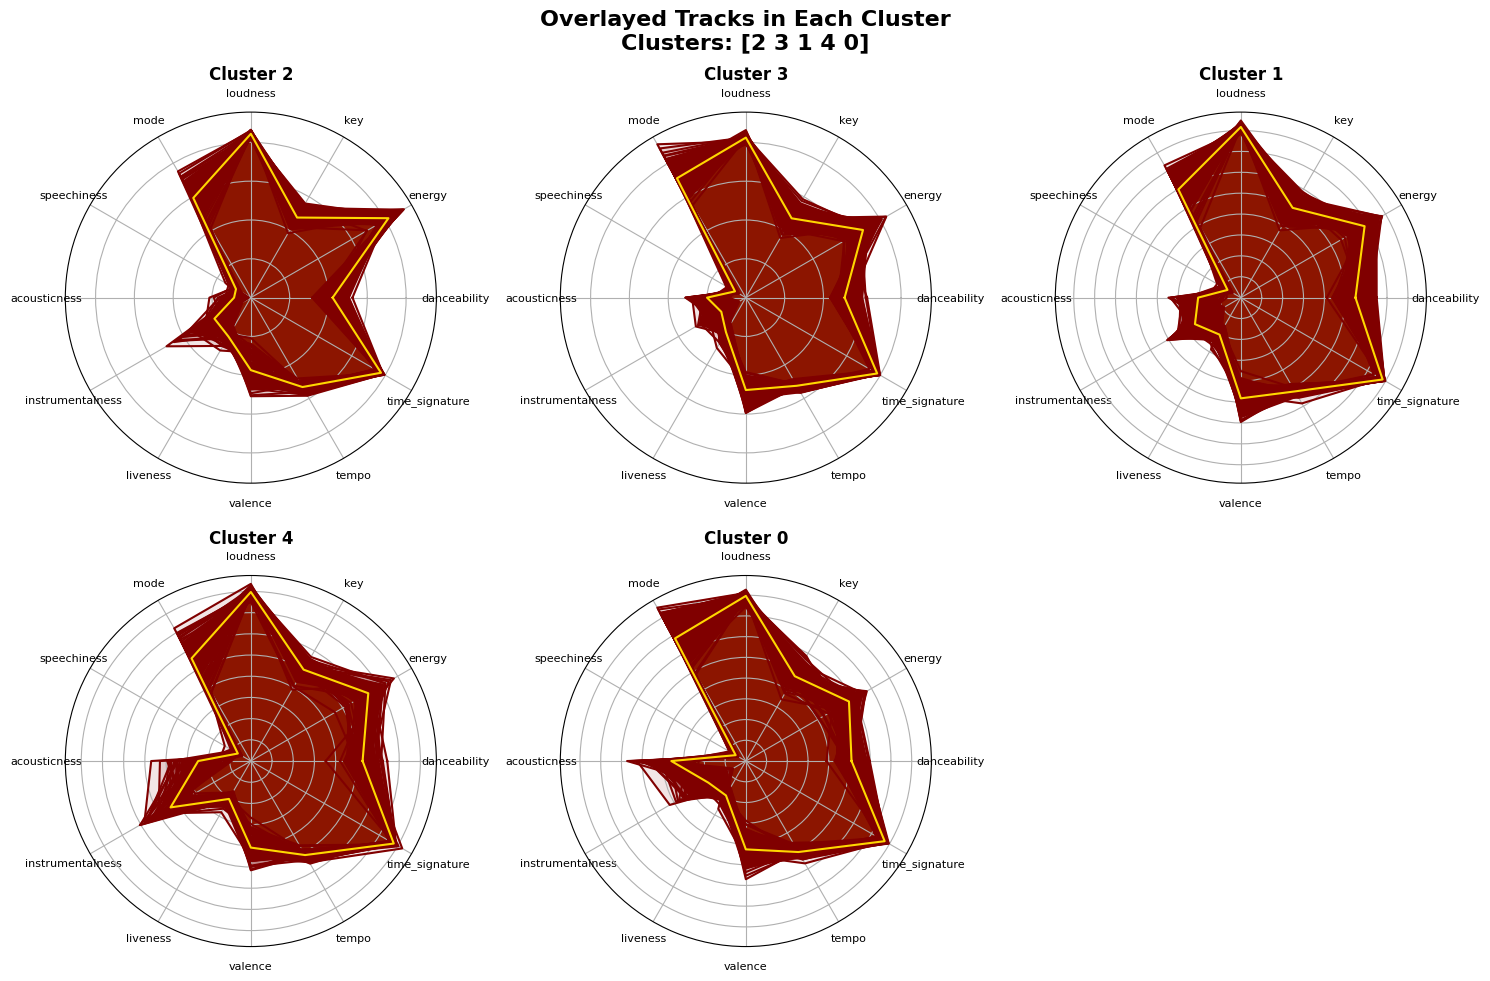

In [51]:
data_to_visualize = df_profiles_kmeans
plot_overlay_user_profiles(
    data=data_to_visualize,
    features=features,
    find_average=True
)

## **Перевіримо на даних кластеризованих ієрархічно**

In [41]:
df_profiles_hierarchical['cluster'].unique(), df_profiles_hierarchical['cluster'].nunique()

(array([1, 2, 0, 3], dtype=int64), 4)

In [42]:
df_profiles_hierarchical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, ec6dfcf19485cb011e0b22637075037aae34cf26 to 7940925886a70f6fa56085a8fc4444efbb5ea41f
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   key               1000 non-null   float64
 3   loudness          1000 non-null   float64
 4   mode              1000 non-null   float64
 5   speechiness       1000 non-null   float64
 6   acousticness      1000 non-null   float64
 7   instrumentalness  1000 non-null   float64
 8   liveness          1000 non-null   float64
 9   valence           1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  time_signature    1000 non-null   float64
 12  cluster           1000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 109.4+ KB


In [43]:
df_profiles_hierarchical.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.513059,0.674371,0.481304,0.816065,0.649721,0.068201,0.227894,0.222611,0.204770,0.451103,0.518801,0.779535,1.221000
std,0.052281,0.079880,0.037776,0.019010,0.086235,0.015644,0.095245,0.106505,0.022980,0.058992,0.017399,0.010686,0.648521
min,0.315669,0.406084,0.343069,0.744280,0.373041,0.040155,0.011339,0.040611,0.147316,0.207768,0.454888,0.725482,0.000000
25%,0.484194,0.626815,0.456543,0.804280,0.592875,0.056593,0.160467,0.140799,0.189237,0.418988,0.508473,0.774194,1.000000
50%,0.513454,0.675843,0.480753,0.817420,0.652174,0.065174,0.219020,0.201168,0.203074,0.454969,0.518339,0.780834,1.000000
75%,0.546819,0.719247,0.506295,0.828636,0.706476,0.075863,0.283254,0.280811,0.217843,0.490144,0.529675,0.786807,2.000000
max,0.650312,0.910921,0.587233,0.864867,0.912458,0.151378,0.572779,0.604928,0.314592,0.595472,0.584769,0.824771,3.000000


In [44]:
df_profiles_hierarchical.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
7557a1fb62b97d4cd895570e9a7bb722dea3f817,0.366893,0.845671,0.434322,0.847264,0.512712,0.100625,0.074391,0.119029,0.267574,0.381278,0.541099,0.775847,1


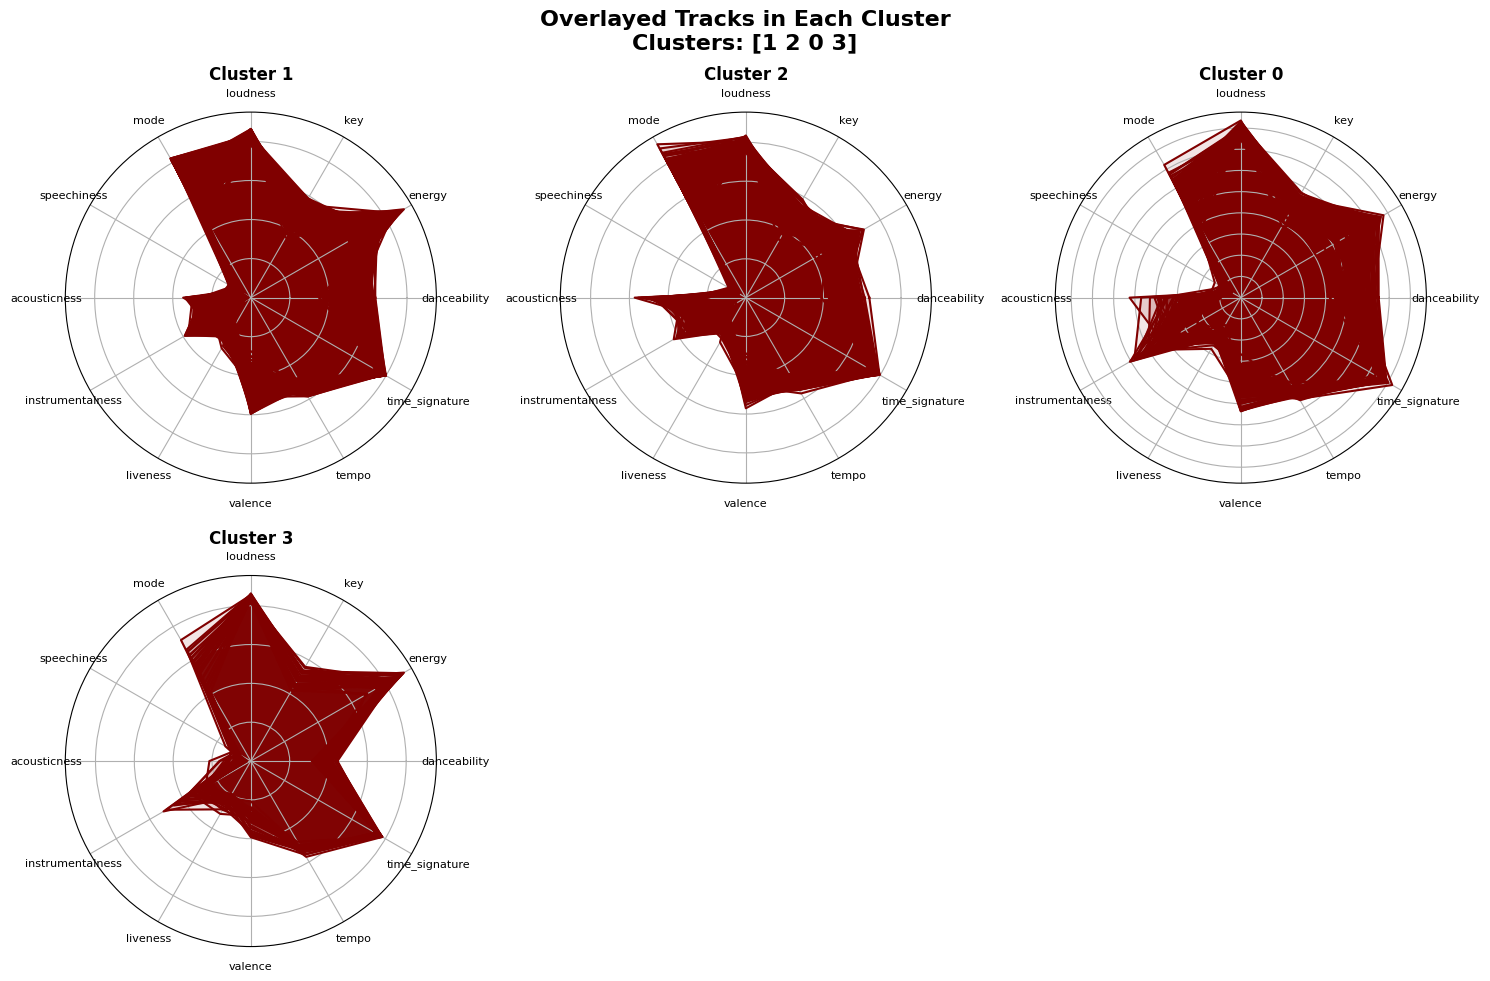

In [45]:
data_to_visualize = df_profiles_hierarchical
plot_overlay_user_profiles(
    data=data_to_visualize,
    features=features
)

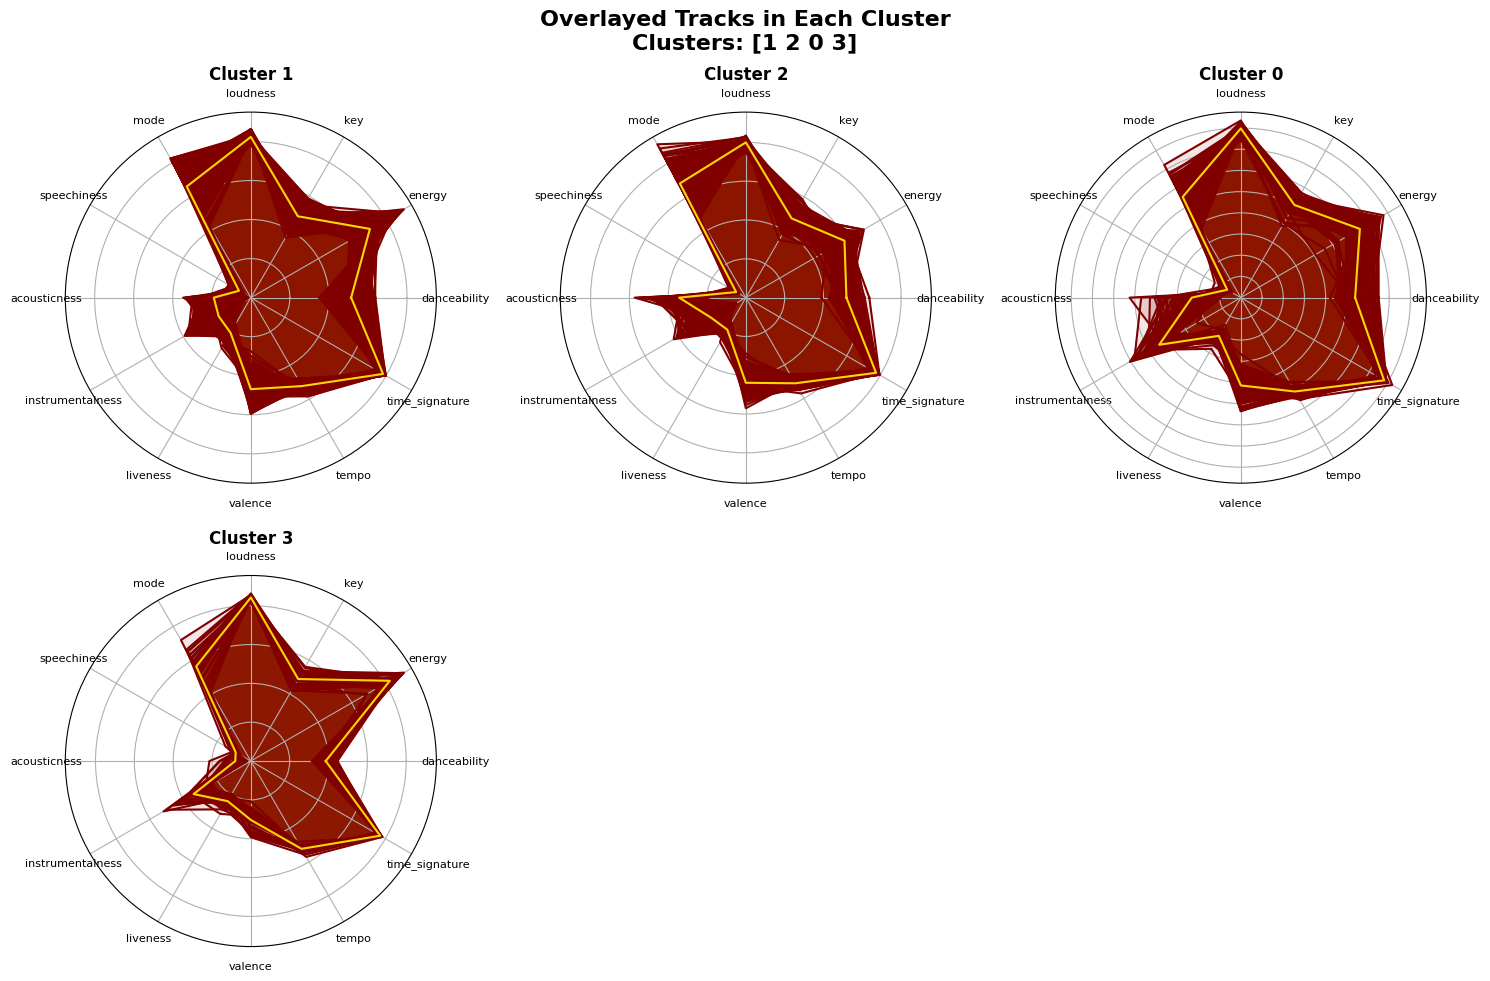

In [52]:
data_to_visualize = df_profiles_hierarchical
plot_overlay_user_profiles(
    data=data_to_visualize,
    features=features,
    find_average=True
)